# Measuring the Radon concentration

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.linear_model import LinearRegression

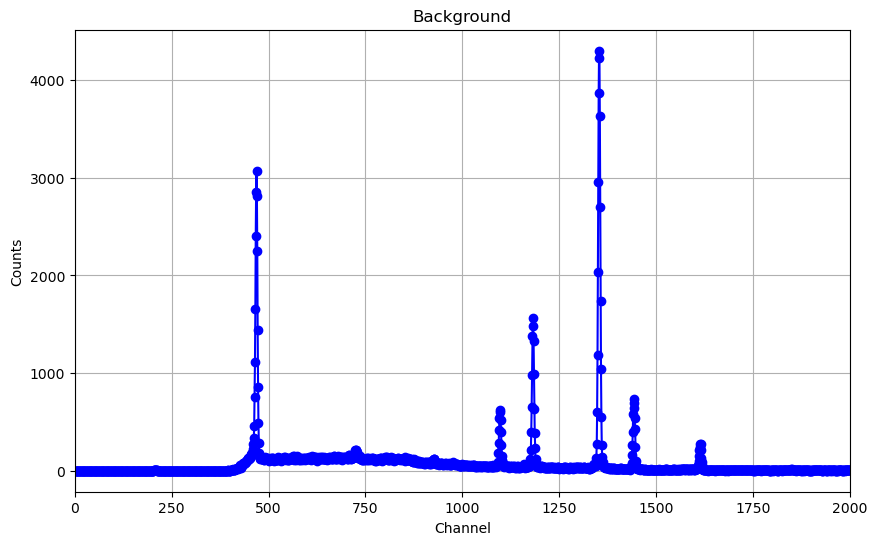

In [39]:
import matplotlib.pyplot as plt

# Path to the uploaded file
file_path = 'calib_ba133.txt'

# Initialize lists to store x and y values
x_values = []
y_values = []

# Read the file
with open(file_path, 'r') as file:
    # Skip the first two lines
    next(file)
    next(file)
    # Read the remaining lines
    for line in file:
        # Split the line into x and y values
        x, y = map(float, line.strip().split())
        x_values.append(x)
        y_values.append(y)

        
# Plotting
plt.figure(figsize=(10, 6))
plt.xlim([0, 2000])
plt.plot(x_values, y_values, marker='o', linestyle='-', color='b')
#plt.scatter(x_values, y_values)
plt.title('Background')
plt.xlabel('Channel')
plt.ylabel('Counts')
plt.grid(True)
plt.show()



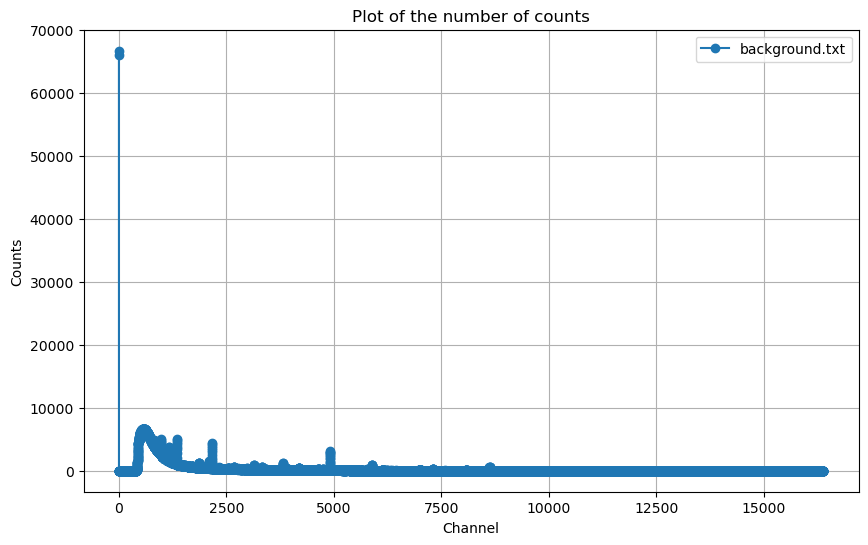

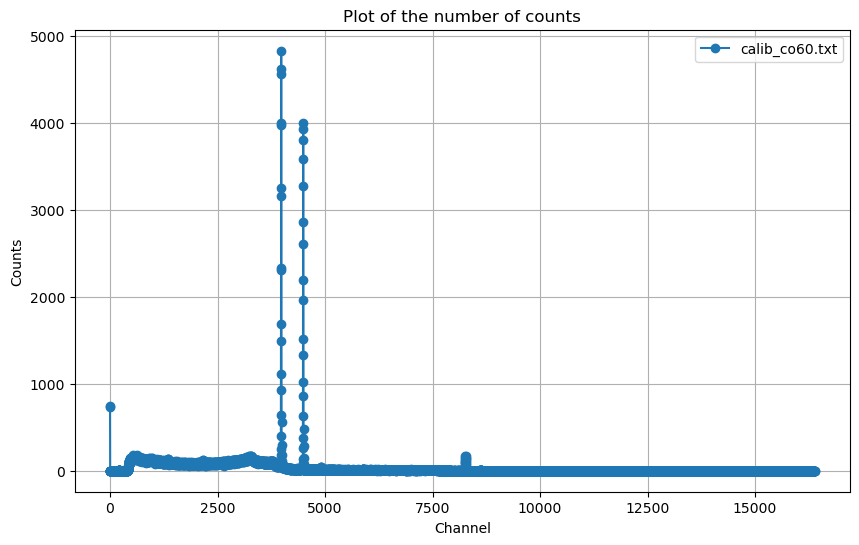

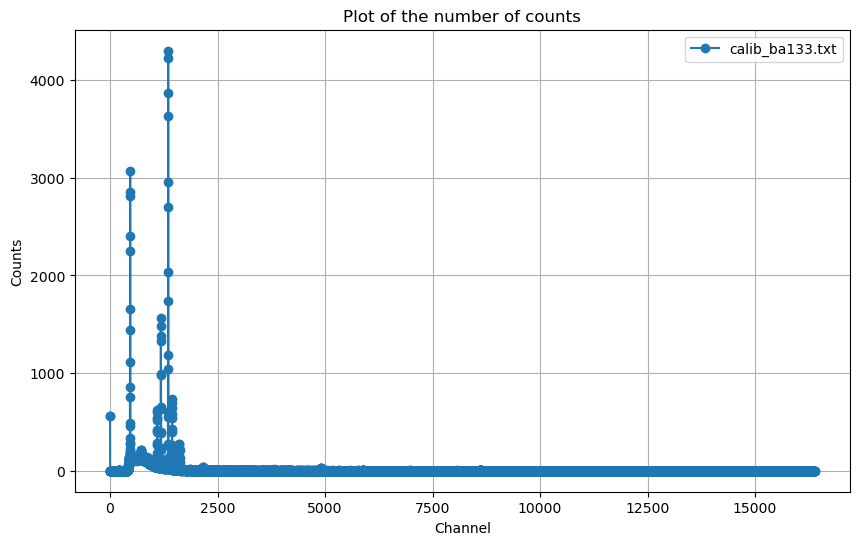

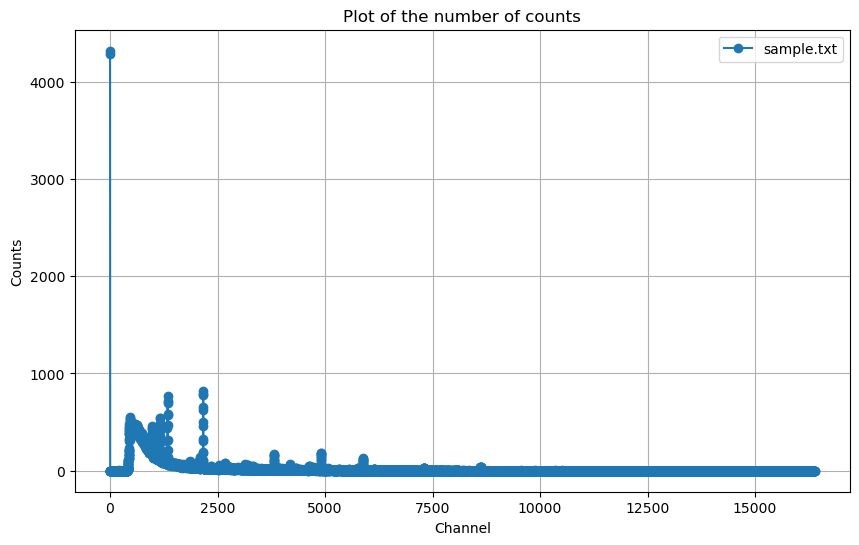

In [40]:
import matplotlib.pyplot as plt

# Placeholder paths for the four files
file_paths = [
    'background.txt',  # Replace with actual file path
    'calib_co60.txt',  # Replace with actual file path
    'calib_ba133.txt',  # Replace with actual file path
    'sample.txt'  # The one you've uploaded
]

# Function to read data from a file and return x, y values
def read_data(file_path):
    x_values = []
    y_values = []
    with open(file_path, 'r') as file:
        for line in file:
            parts = line.strip().split()
            if len(parts) == 2:  # Ensuring there are exactly two values per line
                try:
                    x, y = map(float, parts)
                    x_values.append(x)
                    y_values.append(y)
                except ValueError:
                    # Handle the case where conversion to float fails
                    continue
    return x_values, y_values

# Loop through each file path, read the data, and plot
for file_path in file_paths:
    x_values, y_values = read_data(file_path)
    plt.figure(figsize=(10, 6))
    plt.plot(x_values, y_values, marker='o', linestyle='-', label=file_path)
    plt.title('Plot of the number of counts')
    plt.xlabel('Channel')
    plt.ylabel('Counts')
    plt.legend()
    plt.grid(True)
    plt.show()


Fit failed for peak range 3980-3982: Optimal parameters not found: Number of calls to function has reached maxfev = 800.
Fit failed for peak range 4492-4495: Optimal parameters not found: Number of calls to function has reached maxfev = 800.


TypeError: object of type 'float' has no len()

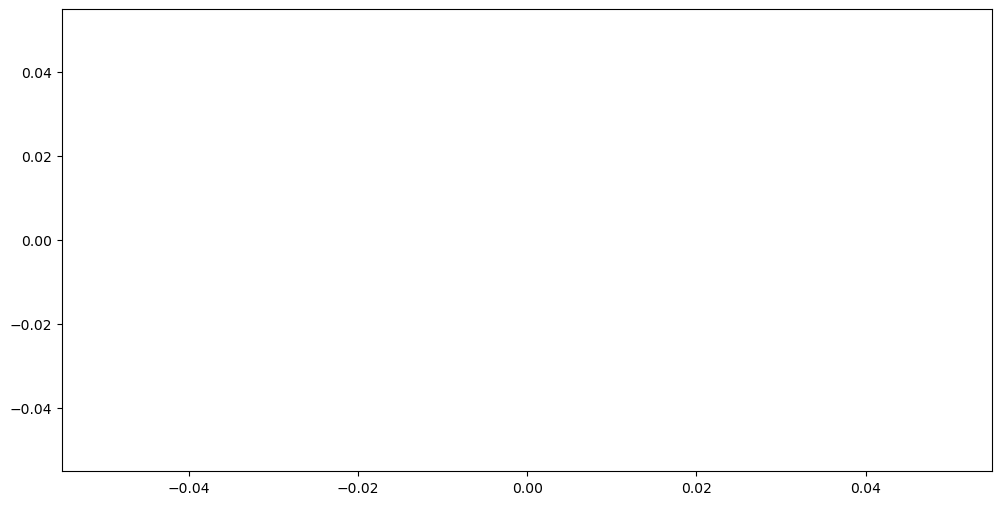

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Gaussian function to fit
def gaussian(x, amplitude, mean, stddev):
    return amplitude * np.exp(-((x - mean) ** 2) / (2 * stddev ** 2))

# Function to fit Gaussian to specified peak ranges and print x-value of peaks
def fit_gaussians_to_peaks(y, peak_ranges):
    fit_params = []
    
    for start, end in peak_ranges:
        x_range = np.arange(start, end + 1)
        y_range = y[start:end + 1]

        # Initial guesses: max amplitude, center of range, estimate of stddev
        initial_guess = [max(y_range), np.mean(x_range), 1]
        
        try:
            # Fit the Gaussian model to the data
            params, _ = curve_fit(gaussian, x_range, y_range, p0=initial_guess)
            fit_params.append(params)
            print(f"Peak found at x = {params[1]:.2f} with amplitude = {params[0]:.2f} and stddev = {params[2]:.2f}")
        except RuntimeError as e:
            print(f"Fit failed for peak range {start}-{end}: {e}")
    
    return fit_params

# Plotting function
def plot_data_and_fits(y, fit_params):
    plt.figure(figsize=(12, 6))
    plt.plot(y, label='Original Data', color='black')
    
    x_vals = np.arange(len(y))
    for params in fit_params:
        plt.plot(x_vals, gaussian(x_vals, *params), label=f'Gaussian fit around {params[1]:.0f}', linestyle='--')
    
    plt.title('Original Data with Fitted Gaussians')
    plt.xlabel('Channel')
    plt.ylabel('Counts')
    plt.legend()
    plt.show()

file_path_co60 = 'calib_co60.txt'
data_co60 = np.loadtxt(file_path)
y_co60 = data_co60[:, 1]  # Assuming the second column has the y-values

# Define the peak ranges you're interested in
peak_ranges = [(3980, 3982), (4492, 4495)]

# Fit Gaussians to these peaks
fit_params = fit_gaussians_to_peaks(y_co60, peak_ranges)

# Plot the original data and the fitted Gaussians
plot_data_and_fits(y, fit_params)
plt.xlim[0, 5000]

0.31110210456209575x + -64.97876349437263


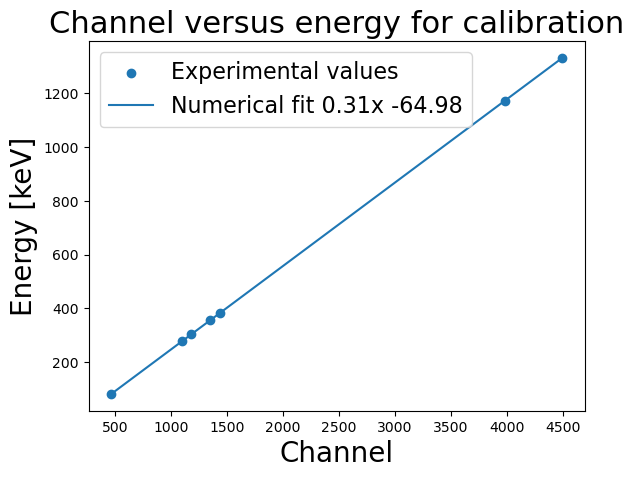

In [45]:
channel_array=np.array([468.8, 1097.43, 1182.47, 1353.36, 1442.899, 3980, 4492])
energy_array=np.array([80.9971, 276.398, 302.853, 356.017, 383.851, 1173.237, 1332.501])
plt.scatter(channel_array, energy_array, label='Experimental values')


x=channel_array
y=energy_array
# Reshape x into a 2D array for fitting
X = [[i] for i in x]  # This creates a 2D array, as required by scikit-learn

# Create a linear regression model
model = LinearRegression()

# Fit the model to the data
model.fit(X, y)

# Get the slope (m) and intercept (b) coefficients
m = model.coef_[0]
b = model.intercept_

print(f'{m}x + {b}')

y_fit=channel_array*m+b

plt.plot(channel_array, y_fit, label=f'Numerical fit {m:.2f}x {b:.2f}')
plt.title('Channel versus energy for calibration', fontsize=22)
plt.xlabel('Channel', fontsize=20)
plt.ylabel('Energy [keV]', fontsize=20)
plt.legend(fontsize=16)

## Efficiency calibration

First writing a function to find the number of counts under the peaks, then compare this with the expected number

In [47]:
def sum_counts_under_peak(y, start, end):
    """
    Sums up the counts under a peak within a given range.

    Parameters:
    - y: numpy array of counts (y-values).
    - start: the starting index of the range.
    - end: the ending index of the range.

    Returns:
    - The sum of counts under the peak from start to end.
    """
    # Ensure start and end are within the bounds of y and are integers
    start, end = int(max(start, 0)), int(min(end, len(y) - 1))
    
    # Sum the counts in the specified range
    sum_counts = y[start:end+1].sum()
    
    return sum_counts



under_curve=sum_counts_under_peak(y_co60, 3965, 3995)
under_curve

355.0

## Defining the intervals where the Gauss peaks are


Peak 1: 460 to 475
Peak 2: 1090 - 1105
Peak 3: 1175 - 1190
Peak 4: 1345 - 1360
Peak 5: 1435 - 1450

from the Cobolt source:

3965 to 3995
4480 to 4505

In [49]:
file_path_ba133 = 'calib_ba133.txt'
data_ba133 = np.loadtxt(file_path)
y_ba133 = data_ba133[:, 1]  # Assuming the second column has the y-values

In [76]:
peak1=sum_counts_under_peak(y_ba133, 460, 475)-120*(475-460)
peak2=sum_counts_under_peak(y_ba133, 1090, 1105)-40*(1105-1090)
peak3=sum_counts_under_peak(y_ba133, 1175, 1190)-40*(1190-1175)
peak4=sum_counts_under_peak(y_ba133, 1345, 1365)-40*(1365-1345)
peak5=sum_counts_under_peak(y_ba133, 1435, 1450)-20*(1450-1435)
peak1_co=sum_counts_under_peak(y_co60, 3965, 3995)-60*(3995-3965)
peak2_co=sum_counts_under_peak(y_co60, 4480, 4505)-20*(4505-4480)



peak_activity=[peak1, peak2, peak3, peak4, peak5, peak1_co, peak2_co]

In [77]:
print(peak1)

3840.0


In [79]:
print(peak4)

788.0


## Finding the activities for both samples

In [80]:
from datetime import datetime

# Define the start and end dates
start_date = datetime.strptime("19.02.1999", "%d.%m.%Y")
end_date = datetime.strptime("13.03.2024", "%d.%m.%Y")

# Calculate the difference in days
t_cobalt = (end_date - start_date).days


#Finding the number of days for the cobalt substance since the activity was measured
t_cobalt


9154

In [81]:
# Define the start and end dates
start_date_ba = datetime.strptime("12.01.2005", "%d.%m.%Y")
end_date_ba = datetime.strptime("13.03.2024", "%d.%m.%Y")

# Calculate the difference in days
t_ba = (end_date_ba - start_date_ba).days


#Finding the number of days for the cobalt substance since the activity was measured
t_ba


7000

\begin{equation}
A(t)=A_0 e^{-\lambda t}
\end{equation}

In [82]:
def A(t, lam, A0):
    return A0*np.exp(-lam*t)


half_time_cobalt=5.2714*365.25 #Converting half-time from years to days
lam_cobalt=np.log(2)/half_time_cobalt
activity_cobalt=A(t_cobalt, lam_cobalt, 47.3e3)
print(activity_cobalt)

1752.457299165437


In [83]:
def A(t, lam, A0):
    return A0*np.exp(-lam*t)


half_time_ba=10.51*365.25 #converting the half-time from years to days
lam_ba=np.log(2)/half_time_ba
activity_ba=A(t_ba, lam_ba, 3.08e3)
print(activity_ba)


'''

We see that the activities seem reasonable

'''

870.2085861630691


'\n\nWe see that the activities seem reasonable\n\n'

Text(0, 0.5, 'Efficiency')

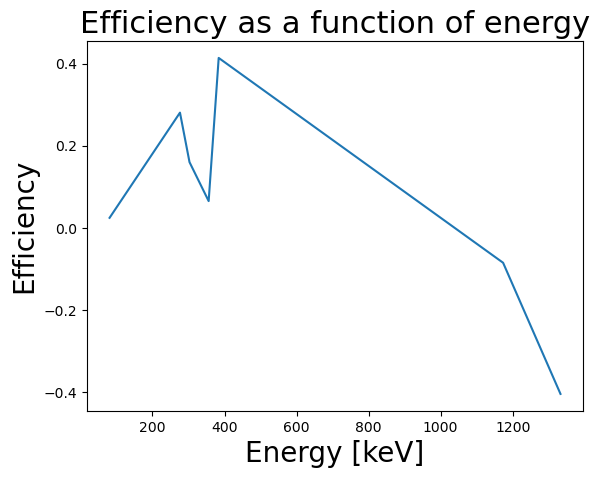

In [87]:
end_time_co=744.523
start_time_co=737.507

end_time_ba=562.437
start_time_ba=558.782

branching_ratios_ba=np.array([34.06, 7.164, 18.33, 62.05, 8.94])
branching_ratios_co=np.array([99.9736, 99.9856])

#Doing the integral activity of cobolt and ba to find the total decays one should expect
integrated_activity_cobalt=activity_cobalt*(end_time_co-start_time_co)
integrated_activity_ba=activity_ba*(end_time_ba-start_time_ba)

#Finding the expected number by dividing by the branching ratio
expected_co=integrated_activity_cobalt/branching_ratios_co
expected_ba=integrated_activity_ba/branching_ratios_ba


expected=np.concatenate((expected_ba, expected_co))

ratio=np.divide(expected, peak_activity)


plt.plot(energy_array, ratio)
plt.title('Efficiency as a function of energy', fontsize=22)
plt.xlabel('Energy [keV]', fontsize=20)
plt.ylabel('Efficiency', fontsize=20)

In [71]:
print(ratio)

[0.0165572  0.20337681 0.10297893 0.03227888 0.30670103 0.34643626
 0.62739853]


In [72]:
print(peak_activity)

[5640.0, 2183.0, 1685.0, 1588.0, 1160.0, 355.0, 196.0]


In [15]:
# Redefine the symbols using ASCII characters
epsilon_f, epsilon_d, R, p_Pb, V, lambda_Pb, lambda_Po, T_f, t_1, t_2 = sp.symbols('epsilon_f epsilon_d R p_Pb V lambda_Pb lambda_Po T_f t_1 t_2')

# Redefine the equation using ASCII characters
N_v_ascii = epsilon_f * epsilon_d * R * p_Pb * V * (
    (1/lambda_Po + 1/lambda_Pb +
     lambda_Pb/(lambda_Po * (lambda_Po - lambda_Pb)) +
     lambda_Po * sp.exp(-lambda_Pb*T_f)/(lambda_Pb * (lambda_Pb - lambda_Po)) *
     (sp.exp(-lambda_Pb*t_1) - sp.exp(-lambda_Pb*t_2))) +
    (lambda_Pb/(lambda_Po * (lambda_Pb - lambda_Po)) *
     (1 - sp.exp(-lambda_Po*T_f)) *
     (sp.exp(-lambda_Po*t_1) - sp.exp(-lambda_Po*t_2)))
)

# Convert the ASCII expression to a string to print it out
ascii_expression_str = str(N_v_ascii)
ascii_expression_str


NameError: name 'sp' is not defined